First run the following cells to import current version of Tensorflow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


Using TensorFlow backend.


## Import the Image dataset

In this notebook, we are going to classify images from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. 


<table>
  <tr><td>
    <img src="https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png"
         alt="CIFAR samples"  >
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="http://yann.lecun.com/exdb/mnist/">MNIST samples</a>.<br/>&nbsp;
  </td></tr>
</table>



In [4]:
tf.random.set_seed(100)
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
num_train, img_rows, img_cols =  train_images.shape
num_test, _, _ =  test_images.shape
num_classes = len(np.unique(train_labels))

## Explore the data

#### Q1: What is the shape of train and test data in MNIST dataset?

In [0]:
# write your code here to answer above question

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

## Preprocess the data

The data must be preprocessed before training the network. 

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model


Model should contain following layers:
  
  Flatten(Input) -> Dense(100, activation='relu') -> Dense(10, activation='softmax')
  
Use 'Adam' optimizer

Use 'accuracy' as your metric

#### Q2: Which loss function would be appropriate here? 



In [0]:
# Build and compile your model in this cell. Make sure to first answer Q2.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Q3: Total number of **parameters**? 


## Train the model

Run the following command to train your model:

In [8]:
history = model.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 1.7466 - accuracy: 0.7796 - val_loss: 1.5773 - val_accuracy: 0.9086
Epoch 2/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5654 - accuracy: 0.9160 - val_loss: 1.5495 - val_accuracy: 0.9271
Epoch 3/10
60000/60000 [==============================] - 1s 17us/sample - loss: 1.5457 - accuracy: 0.9292 - val_loss: 1.5370 - val_accuracy: 0.9347
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 1.5345 - accuracy: 0.9375 - val_loss: 1.5297 - val_accuracy: 0.9410
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5270 - accuracy: 0.9436 - val_loss: 1.5231 - val_accuracy: 0.9471
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5207 - accuracy: 0.9488 - val_loss: 1.5194 - val_accuracy: 0.9500
Epoch 7/10
60000/60000 [==============================] 

Run the above command before answering Q4.

Modify the model and run the above code answer Q5.

In [9]:
test_loss, valid_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nValidation accuracy:', valid_acc)

10000/10000 - 0s - loss: 1.5090 - accuracy: 0.9563

Validation accuracy: 0.9563


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.9564 - accuracy: 0.6652 - val_loss: 1.7600 - val_accuracy: 0.7962
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 1.7051 - accuracy: 0.8450 - val_loss: 1.6529 - val_accuracy: 0.8807
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 1.6425 - accuracy: 0.8817 - val_loss: 1.6191 - val_accuracy: 0.8968
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 1.6176 - accuracy: 0.8927 - val_loss: 1.6016 - val_accuracy: 0.9025
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 1.6029 - accuracy: 0.8986 - val_loss: 1.5906 - val_accuracy: 0.9066
Epoch 6/10
60000/60000 [==============================] - 1s 11us/sample - loss: 1.5929 - accuracy: 0.9031 - val_loss: 1.5826 - val_accuracy: 0.9104
Epoch 7/10
60000/60000 [==============================] 

## Test Underfitting and Overfitting

In [0]:
# summarize history for accuracy
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

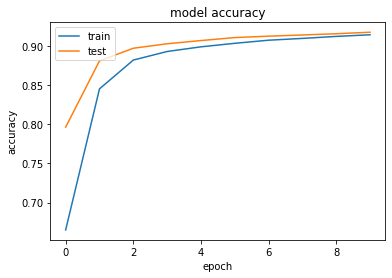

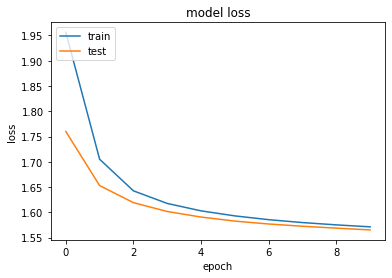

In [13]:
plot_acc(history)
plot_loss(history)